# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

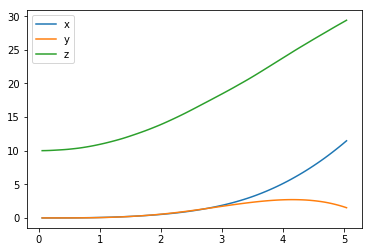

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

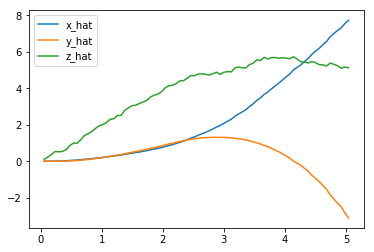

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

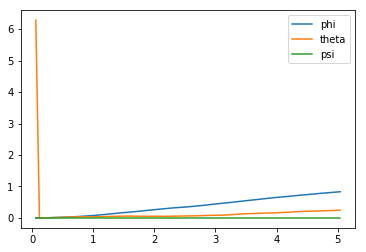

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

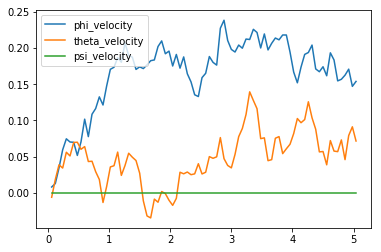

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

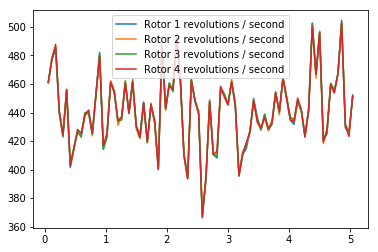

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -7.27794182  25.12062165  20.15124539   0.83174194   0.24617515   0.        ]
[ -4.46050227  14.17942461  -1.11133074]
[ 0.15390169  0.07149431  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 
ps_agent_rewards = np.zeros((num_episodes,))

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            ps_agent_rewards[i_episode-1] = agent.score
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.551 (best =  -0.049), noise_scale = 3.255

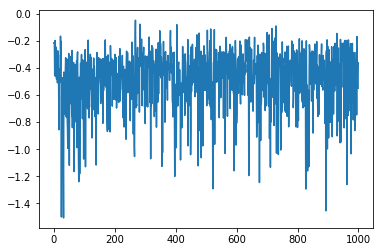

In [13]:
plt.plot(ps_agent_rewards)

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [5]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from my_task import MyTask

runtime = 10.                                     # time limit of the episode
init_pose = np.array([0., 0., 1., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([10, 10, 10, 0, 0, 0])
file_output = 'data.txt'  

#target_pos = np.array([0., 0., 10.])
task = MyTask(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)


Using TensorFlow backend.


In [14]:
def evaluate_hyper_params(mu=0, theta=0.15, sigma=0.2, gamma=0.99, tau=0.01):
    agent = DDPG(task, mu = mu,theta = theta, sigma = sigma,gamma = gamma,tau = tau)
    num_episodes = 10
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action,reward,next_state,done)
            state = next_state
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                    i_episode, agent.score, agent.best_score), end="")  # [debug]
                break
        sys.stdout.flush()
    return agent.best_score

In [15]:
#evaluate_hyper_params(mu = 10)

In [16]:
def find_best_param(param='mu'):
    if param is 'mu':
        mu_vals = np.linspace(0,0.9,10)
        best_score = -np.inf 
        best_mu = 0
        for mu_val in mu_vals : 
            current_score = evaluate_hyper_params(mu=mu_val)
            if current_score > best_score :
                best_score = current_score
                best_mu = mu_val
            print(mu_val, current_score)  
    return best_mu, best_score 

In [17]:
#best_mu, best_score = find_best_param()

In [15]:
from agents.agent import DDPG
from my_task import MyTask

task = MyTask(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task, mu = 0.2) 
num_episodes = 500
rewards = np.zeros((num_episodes,))

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action,reward,next_state,done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}) runtime = {}".format(
                i_episode, agent.score, agent.best_score, agent.count), end="")  # [debug]
            rewards[i_episode-1] = agent.score
            break
    sys.stdout.flush()

Episode =  500, score =  21.033 (best =  34.604) runtime = 80

Text(0,0.5,'Reward')

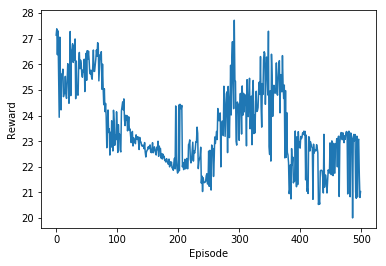

In [16]:
from matplotlib import pyplot as plt
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")

In [18]:
agent.actor_local.model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                608       
_________________________________________________________________
batch_normalization_85 (Batc (None, 32)                128       
_________________________________________________________________
activation_97 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_86 (Batc (None, 64)                256       
_________________________________________________________________
activation_98 (Activation)   (None, 64)                0         
__________

In [19]:
agent.actor_target.model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)                608       
_________________________________________________________________
batch_normalization_88 (Batc (None, 32)                128       
_________________________________________________________________
activation_100 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_89 (Batc (None, 64)                256       
_________________________________________________________________
activation_101 (Activation)  (None, 64)                0         
__________

In [20]:
agent.critic_local.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             (None, 18)           0                                            
__________________________________________________________________________________________________
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_91 (Dense)                (None, 32)           608         states[0][0]                     
__________________________________________________________________________________________________
dense_93 (Dense)                (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [21]:
agent.critic_target.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             (None, 18)           0                                            
__________________________________________________________________________________________________
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_95 (Dense)                (None, 32)           608         states[0][0]                     
__________________________________________________________________________________________________
dense_97 (Dense)                (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
batch_norm

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0,0.5,'Reward')

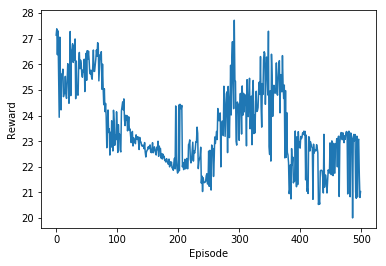

In [22]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I have atleast tried some 50 variations of reward function to get the quadcopter learn to take off to [10,10,10]. 

Final one i have left for the submission is - 

```python 
reward = 1.-.003*(abs(self.sim.pose[:3] - self.target_pos[:3])).sum() + \
            10*min(self.target_pos[2],self.sim.pose[2])
```
In the first part, I have changed 0.3 to .003 from the sample reward function given. 
The second part of the sum gives extra rewards for progressing towards target position height. This should ensure quadcopter to learn to gain the height first. I have used min function to clip this part of reward when height of quadcopter goes above than desired height. After reaching the desired height, then it gives more importance to the distance from the target position and favour to move towards that to gain positive reward. 

I have tried considering the angular velocities as well, but it didn't make much difference. 

Few more things can be scope for improvement
- negatively reward when quadcopter goes above the desired height instead of clipping
- Consider angular velocticities in the reward

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
### 1
As suggested in the comments I have used DDPG methodology, which used actor-critic method of deep reinforcement learning. I imported the code structure from the subsequent lessions and modified below things - 
Added following things to both actor and critic Deep learning models: 
    - Added L2 regularisation in dense layers 
    - Added Batch normalization 
    - Added drop out layers ( only in crictic model ) 
    - Used learning rate of 0.0001 
Then updated step() method to keep track of average score for the episode, best score. 
Updated resest_episode() to reset the above values. 
I have used Ornstein-Uhlenbeck process to generate noise for model to favour exploration. Used 10x of noise returned by OU process. By increasing noise, I actually notice the change in rewards plot which indication more exploration instead of being flat. 
I have used Replaybuffer to store all experience and use them learn in batches ( of size 64 ) 

### 2
I have written the methods  $evaluate_hyper_params$ and $find_best_param$ to find the best value of mu. This I ran it on AWS GPU instance once and chose mu to be 0.2. I randomly tried to change other values as well, but noticed that the default values seems to be best work. 
Final values of hyper parameters: 
```python
mu=0.2, theta=0.15, sigma=0.2, gamma=0.99, tau=0.01
```
### 3 
#### Actor 
Defined input layer with number of nodes as state size : 
```python
        # Define input layer (states)
        states = layers.Input(shape=(self.state_size,), name='states')
```
Input layer is followed by a series of three Dense hidden layers with nodes 32, 64 and 32 respectively. 
Each of these hidden layers use L2 regularizers and batch normalization with relu activation function. 
```python
        # Add hidden layers
        net = layers.Dense(units=32, kernel_regularizer=regularizers.l2(0.01))(states)
        net = layers.BatchNormalization()(net)
        net = layers.Activation('relu')(net)
        
        net = layers.Dense(units=64, kernel_regularizer=regularizers.l2(0.01))(net)
        net = layers.BatchNormalization()(net)
        net = layers.Activation('relu')(net)
        
        net = layers.Dense(units=32, kernel_regularizer=regularizers.l2(0.01))(net)
        net = layers.BatchNormalization()(net)
        net = layers.Activation('relu')(net)
```
Then final output layer with sigmoid activation
```python
        raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
            name='raw_actions')(net)
```


#### Critic 

Define input layers for state path and action path with size as number of states and actions respectively. 

```python
        states = layers.Input(shape=(self.state_size,), name='states')
        actions = layers.Input(shape=(self.action_size,), name='actions')
```

From here both state path and action path has similar hidden layers : 
Two dense layers with 32 and 64 nodes with 'relu'activation followed by dropout. 

Then ,combined state and action pathways with 'relu' activation : 
```python
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)
```
Added final output layer to prduce action values (Q values)
```python
        Q_values = layers.Dense(units=1, name='q_values')(net)

```

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard? 
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
I feel 'take off' task I have tried is not straight forward task to learn. The major driver is the reward function that defines how well agent can learn. Unfortunately, I could not get to right spot after so many trials. The rewards plot I got indicates that agent is exploring well, but somehow tending to settle towards less reward. The other part the exploration do not discover the episodes all around in the possible reward space. It is getting into some sort of local minima/maxima, if I am not wrong. 
Although not a complete list, a sneak peek into what I have tried - 
    - Various reward functions, as commented in $get_rewards$ code. 
    - Without regularization and batch normalization. 
    - Increasing the number of nodes in hidden layers - this didn't help much 
    - Using 5x, 10x of the noise returned by OU process. 
    - Decreasing the batch size from 64 to 10 - I hoped that learning would be more better frequent and so is the updation of weights in the Neural network models used by agent. 
    - Diffenret learning rates in actor and critic models - used 0.01 & 0.0001. The later one gave slightly better results. 
The final performance of the agent is not so good. I think the agent didn't explore the all the possible episodes well and hence didn't get to some paths where rewards would have been much less or highest. 
I'm going to continue to try this offline. This is interesting stuff to get a hang on. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- I find it clueless when I first opened the workspace. Later, I saw the content in later lessions to understand the DDPG implemenation using replay buffer and OU noise. Then I started to connect the dots slowly. I eventually figured out the crux of the problem lies in designing the reward function. On the other side, the theorical lessons preceeding to this project are not very useful and taught in a hurry/abstract way. I feel the content of the lessons and way of introducing concepts would have been much better. I found it very difficult to follow through the RL part especially after dynamic programming lession. Content in all the lectures felt like a mere reading of pseudo code of the algorithms with out any effort in explaining the concepts.  
- I wanted to understand why my agent is stuck between some local boundaries in the possible rewards space. Somehow, it doesnt' seem to be exploring everything. 